# EDA: describe

Es una ampliacion de la informacion descriptiva del metodo *describe()* de *Pandas*.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 99
import numpy as np
from datetime import datetime
from eda import describe_info, describe_numeric, describe_categorical, describe_datetime, describe_bivariate, describe_missing, describe_duplicates

---
## LOAD *Iris* data

In [2]:
# load dataset
dataset = load_iris()
dataset.keys()
# dataset to df
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
data['class'] = dataset.target
dclass = dict()
for i, ic in enumerate(dataset.target_names):
    dclass[i] = ic
data['class'] = data['class'].map(dclass)

### general info

In [3]:
describe_info(data)

,types,mixed_types,unique,magnitude,%nan,num_records
variable,,,,,,
sepal length (cm),float64,float,35,0.0,0.0,150
sepal width (cm),float64,float,23,0.0,0.0,150
petal length (cm),float64,float,43,0.0,0.0,150
petal width (cm),float64,float,22,0.0,0.0,150
class,object,numpy.str_,3,NaN,0.0,150


### numerical

In [4]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

[info] Function "describe_numeric()" finished in 2.25 seconds.


,count,mode,mean,std,iqr,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
sepal length (cm),150,5.0,5.84,0.83,1.3,4.3,4.60,5.1,5.80,6.4,7.25,7.9,-0.57,0.31,False,False,True
sepal width (cm),150,3.0,3.06,0.44,0.5,2.0,2.34,2.8,3.00,3.3,3.80,4.4,0.18,0.32,False,True,True
petal length (cm),150,1.4,3.76,1.77,3.5,1.0,1.30,1.6,4.35,5.1,6.10,6.9,-1.40,-0.27,False,False,False
petal width (cm),150,0.2,1.20,0.76,1.5,0.1,0.20,0.3,1.30,1.8,2.30,2.5,-1.34,-0.10,False,False,True


### categorical

In [5]:
# describe
dfc = describe_categorical(data, max_size_cats = 3, alpha = .05)
dfc

[info] Function "describe_categorical()" finished in 0.02 seconds.


,count,unique,uniform,value0,value1,value2,%value0,%value1,%value2
var,,,,,,,,,
class,150,3,True,versicolor,setosa,virginica,33.33,33.33,33.33


### bivariate relationship

In [6]:
describe_bivariate(data)

[info] Function "describe_bivariate()" finished in 1.48 seconds.


,variable1,variable2,depend_corr_linear,corr_linear,corr_non_linear,depend_chi2,subsamples_diff_dist
0,sepal length (cm),sepal width (cm),True,-0.22,0.32,NaN,NaN
1,sepal length (cm),petal length (cm),True,0.88,0.77,NaN,NaN
2,sepal length (cm),petal width (cm),True,0.84,0.72,NaN,NaN
3,sepal width (cm),petal length (cm),True,-0.52,0.43,NaN,NaN
4,sepal width (cm),petal width (cm),True,-0.41,0.45,NaN,NaN
5,petal length (cm),petal width (cm),True,0.96,0.85,NaN,NaN
0,class,petal length (cm),NaN,NaN,NaN,NaN,True
1,class,petal width (cm),NaN,NaN,NaN,NaN,True
2,class,sepal length (cm),NaN,NaN,NaN,NaN,True
3,class,sepal width (cm),NaN,NaN,NaN,NaN,True


### missing values

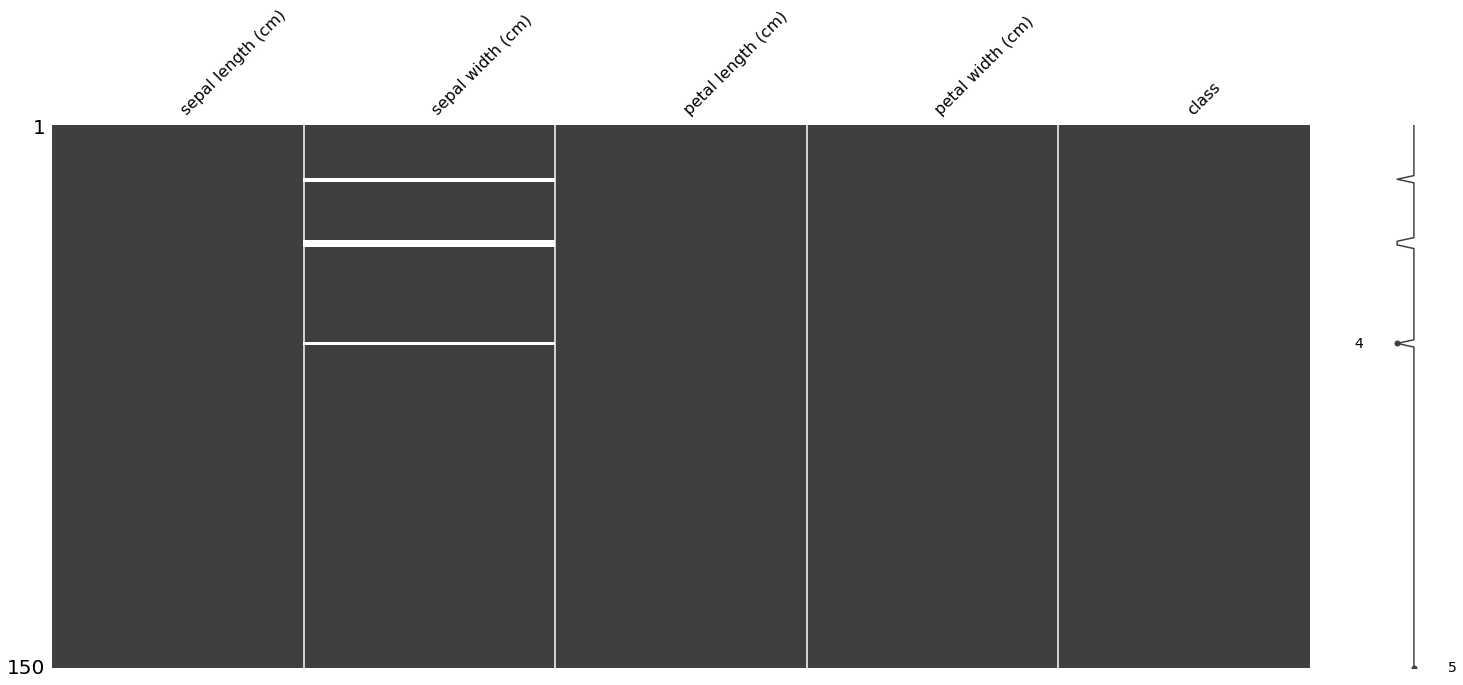

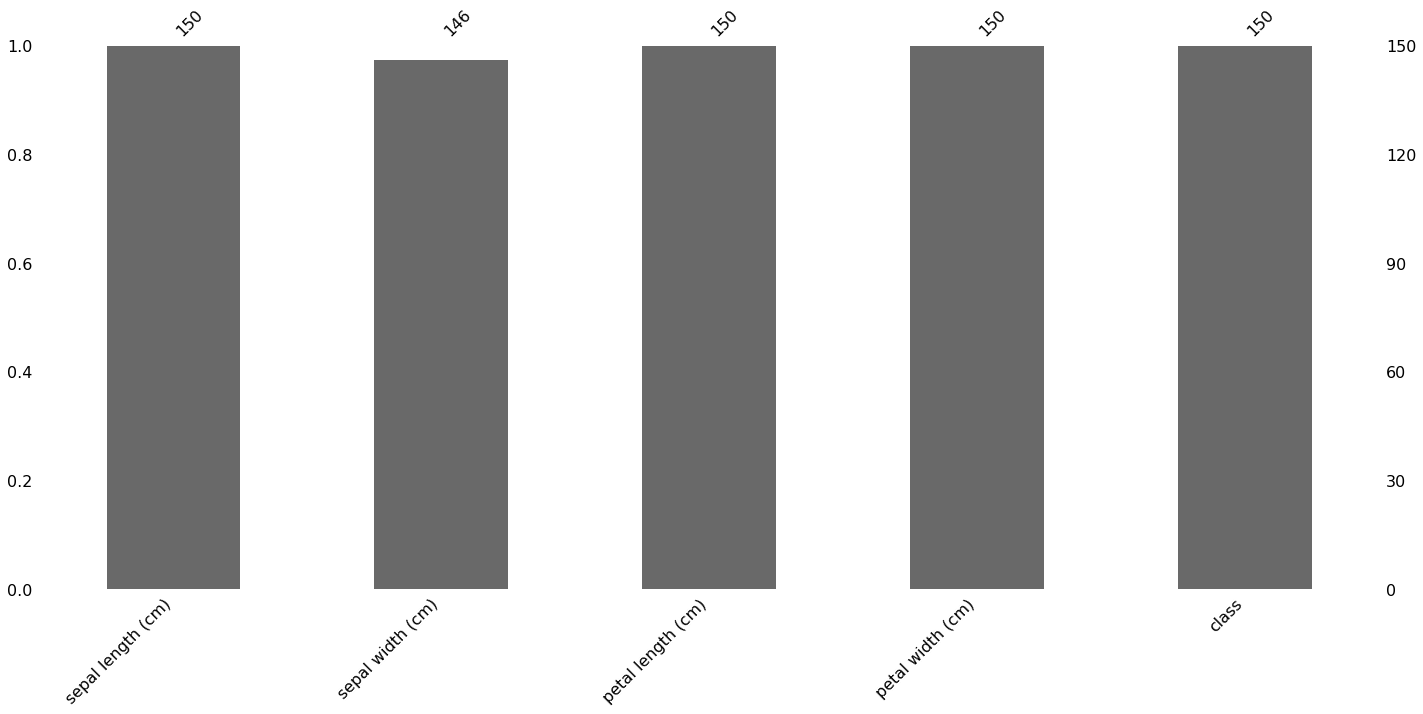

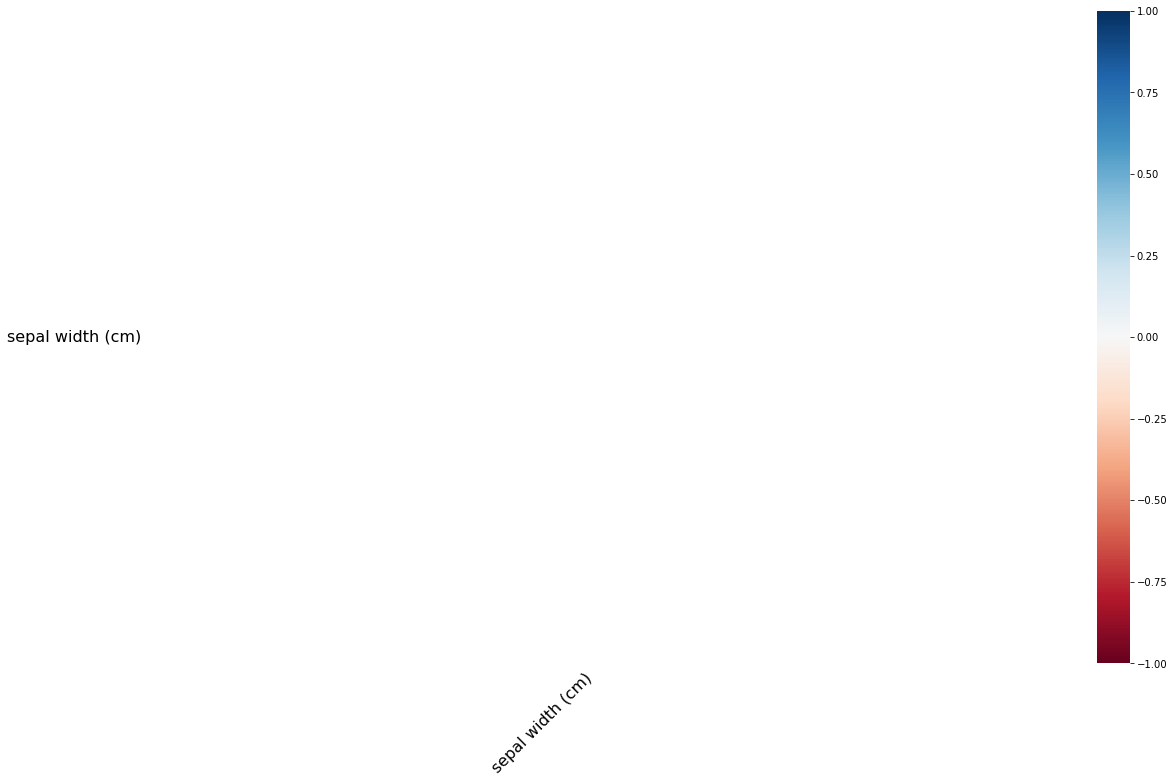

In [7]:
describe_missing(data)

### duplicates

In [8]:
describe_duplicates(data)

[info] Function "describe_duplicates()" finished in 0.01 seconds.


,col0,num_cols,percent_dupli
0,class,1,98.0


---
## LOAD *Titanic* data

In [9]:
import seaborn
data = seaborn.load_dataset('titanic')
data.shape

(891, 15)

### general info

In [10]:
dfinfo = describe_info(data)
dfinfo

,types,mixed_types,unique,magnitude,%nan,num_records
variable,,,,,,
adult_male,bool,bool,2,NaN,0.00,891
alone,bool,bool,2,NaN,0.00,891
class,category,str,3,NaN,0.00,891
deck,category,str,7,NaN,77.22,203
age,float64,float,88,1.0,19.87,714
fare,float64,float,248,1.0,0.00,891
survived,int64,int,2,0.0,0.00,891
pclass,int64,int,3,0.0,0.00,891
sibsp,int64,int,7,0.0,0.00,891


In [11]:
# int to str (cat)
for col in dfinfo[dfinfo.types=='int64'].index.tolist():
    data[col] = data[col].astype(str)

### numerical

In [12]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

[info] Function "describe_numeric()" finished in 1.35 seconds.


,count,mode,mean,std,iqr,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
age,714,24.00,29.7,14.53,17.88,0.42,4.00,20.12,28.00,38.0,56.00,80.00,0.17,0.39,False,False,True
fare,891,8.05,32.2,49.69,23.09,0.00,7.22,7.91,14.45,31.0,112.08,512.33,33.20,4.78,False,False,True


### categorical

In [13]:
# describe
dfc = describe_categorical(data.copy(), max_size_cats = 4, alpha = .05)
dfc

[info] Function "describe_categorical()" finished in 0.09 seconds.


,count,unique,uniform,value0,value1,value2,value3,%value0,%value1,%value2,%value3
var,,,,,,,,,,,
survived,891,2,False,0,1,,,61.62,38.38,,
pclass,891,3,False,3,1,2,,55.11,24.24,20.65,
sex,891,2,False,male,female,,,64.76,35.24,,
sibsp,891,7,False,0,1,2,others,68.24,23.46,3.14,5.17
parch,891,7,False,0,1,2,others,76.09,13.24,8.98,1.68
embarked,889,3,False,S,C,Q,,72.44,18.9,8.66,
class,891,3,False,Third,First,Second,,55.11,24.24,20.65,
who,891,3,False,man,woman,child,,60.27,30.42,9.32,
adult_male,891,2,False,True,False,,,60.27,39.73,,


### bivariate relationship

In [14]:
describe_bivariate(data)

[info] it was simplified the categorical variable 'sibsp'.
[info] it was simplified the categorical variable 'parch'.
[info] it was simplified the categorical variable 'deck'.
[info] Function "describe_bivariate()" finished in 1.01 seconds.


,variable1,variable2,depend_corr_linear,corr_linear,corr_non_linear,depend_chi2,subsamples_diff_dist
0,age,fare,True,0.1,0.2,NaN,NaN
0,survived,pclass,NaN,NaN,NaN,True,NaN
1,survived,sex,NaN,NaN,NaN,True,NaN
2,survived,sibsp,NaN,NaN,NaN,True,NaN
3,survived,parch,NaN,NaN,NaN,True,NaN
4,survived,embarked,NaN,NaN,NaN,True,NaN
5,survived,class,NaN,NaN,NaN,True,NaN
6,survived,who,NaN,NaN,NaN,True,NaN
7,survived,adult_male,NaN,NaN,NaN,True,NaN
8,survived,deck,NaN,NaN,NaN,False,NaN


### missing values

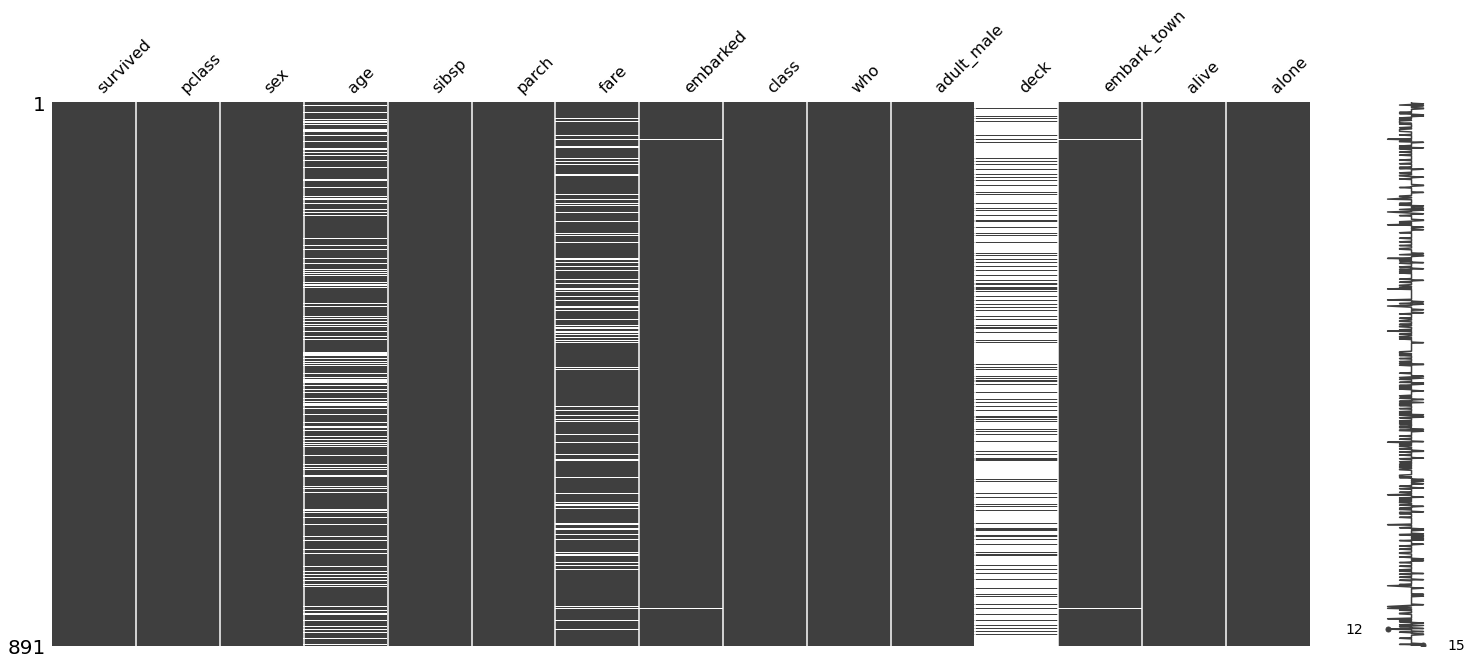

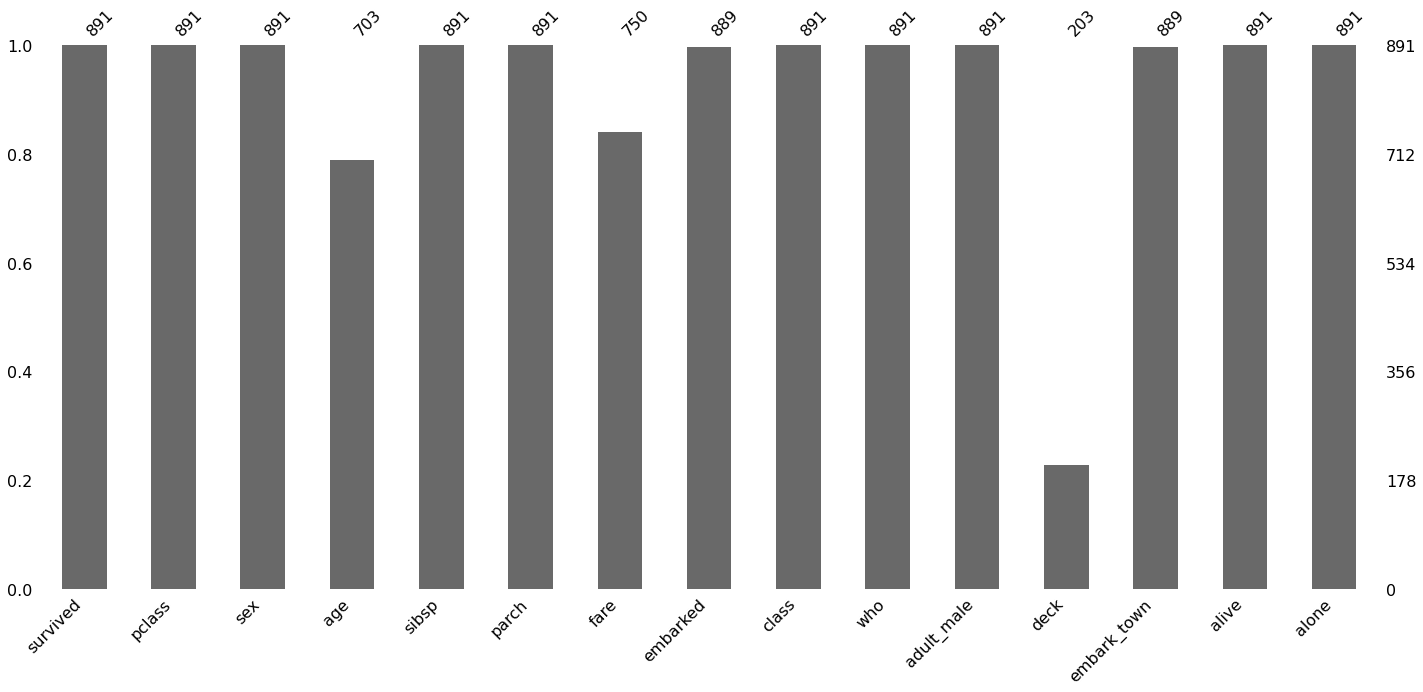

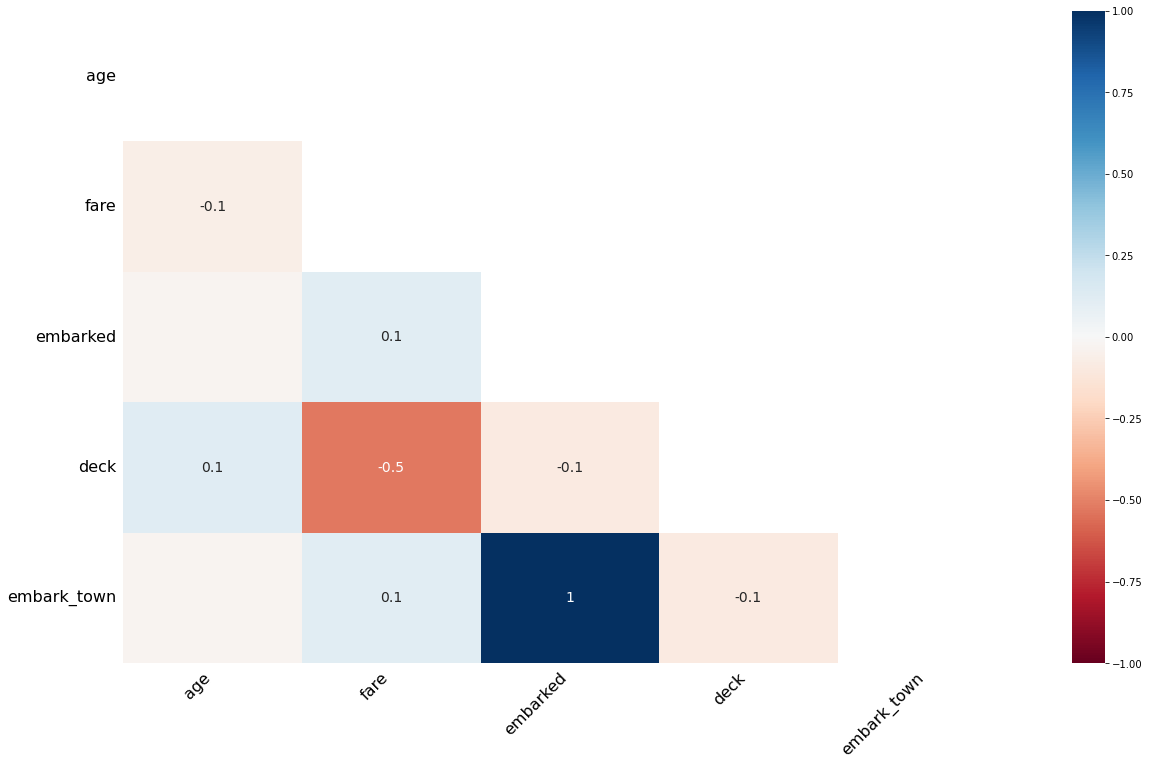

In [15]:
describe_missing(data)

### duplicates

In [16]:
describe_duplicates(data)

[info] Function "describe_duplicates()" finished in 9.22 seconds.


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,num_cols,percent_dupli
8190,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone,13,70.707071
8180,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,,12,79.349046
8185,survived,pclass,sex,sibsp,embarked,class,who,adult_male,deck,embark_town,alive,alone,,12,77.777778
8186,survived,pclass,sex,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone,,12,76.206510
8182,survived,pclass,sex,sibsp,parch,embarked,class,adult_male,deck,embark_town,alive,alone,,12,73.288440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,embarked,,,,,,,,,,,,,1,99.551066
10,embark_town,,,,,,,,,,,,,1,99.551066
3,sibsp,,,,,,,,,,,,,1,99.438833
4,parch,,,,,,,,,,,,,1,99.438833


---
## load *Tips* data

In [17]:
import seaborn
data = seaborn.load_dataset('tips')
data.shape

(244, 7)

### general info

In [18]:
describe_info(data)

,types,mixed_types,unique,magnitude,%nan,num_records
variable,,,,,,
sex,category,str,2,NaN,0.0,244
smoker,category,str,2,NaN,0.0,244
day,category,str,4,NaN,0.0,244
time,category,str,2,NaN,0.0,244
total_bill,float64,float,229,1.0,0.0,244
tip,float64,float,123,0.0,0.0,244
size,int64,int,6,0.0,0.0,244


### numerical

In [19]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

[info] Function "describe_numeric()" finished in 1.58 seconds.


,count,mode,mean,std,iqr,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
total_bill,244,13.42,19.79,8.90,10.78,3.07,9.56,13.35,17.8,24.13,38.06,50.81,1.17,1.13,False,False,True
tip,244,2.00,3.00,1.38,1.56,1.00,1.44,2.00,2.9,3.56,5.20,10.00,3.55,1.46,False,False,False
size,244,2.00,2.57,0.95,1.00,1.00,2.00,2.00,2.0,3.00,4.00,6.00,1.67,1.44,False,False,False


### categorical

In [20]:
# describe
dfc = describe_categorical(data, max_size_cats = 6, alpha = .05)
dfc

[info] Function "describe_categorical()" finished in 0.04 seconds.


,count,unique,uniform,value0,value1,value2,value3,value4,value5,%value0,%value1,%value2,%value3,%value4,%value5
var,,,,,,,,,,,,,,,
sex,244,2,False,Male,Female,,,,,64.34,35.66,,,,
smoker,244,2,True,No,Yes,,,,,61.89,38.11,,,,
day,244,4,False,Sat,Sun,Thur,Fri,,,35.66,31.15,25.41,7.79,,
time,244,2,False,Dinner,Lunch,,,,,72.13,27.87,,,,
size,244,6,False,2,3,4,5,6,1,63.93,15.57,15.16,2.05,1.64,1.64


### bivariate relationship

In [21]:
describe_bivariate(data)

[info] it was simplified the categorical variable 'size'.
[info] Function "describe_bivariate()" finished in 0.44 seconds.


,variable1,variable2,depend_corr_linear,corr_linear,corr_non_linear,depend_chi2,subsamples_diff_dist
0,total_bill,tip,True,0.62,0.46,NaN,NaN
0,sex,smoker,NaN,NaN,NaN,False,NaN
1,sex,day,NaN,NaN,NaN,True,NaN
2,sex,time,NaN,NaN,NaN,True,NaN
3,sex,size,NaN,NaN,NaN,False,NaN
4,smoker,day,NaN,NaN,NaN,True,NaN
5,smoker,time,NaN,NaN,NaN,False,NaN
6,smoker,size,NaN,NaN,NaN,False,NaN
7,day,time,NaN,NaN,NaN,True,NaN
8,day,size,NaN,NaN,NaN,True,NaN


### missing values

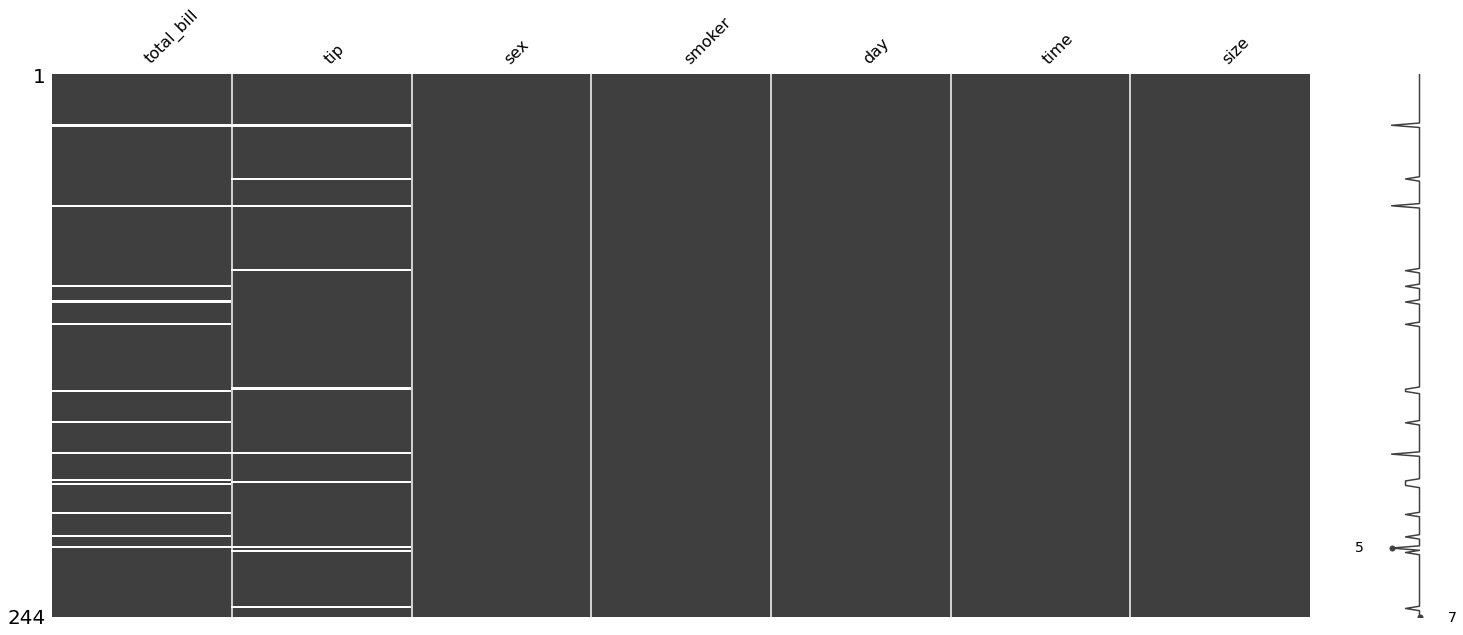

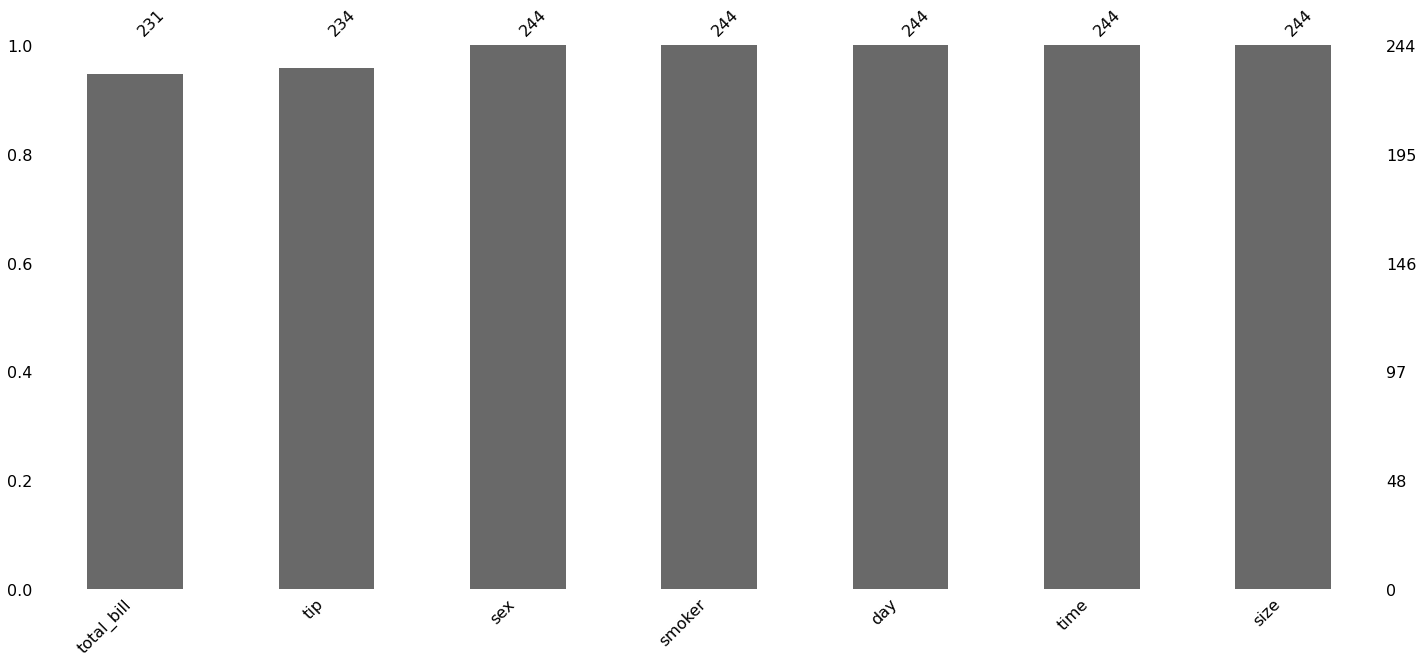

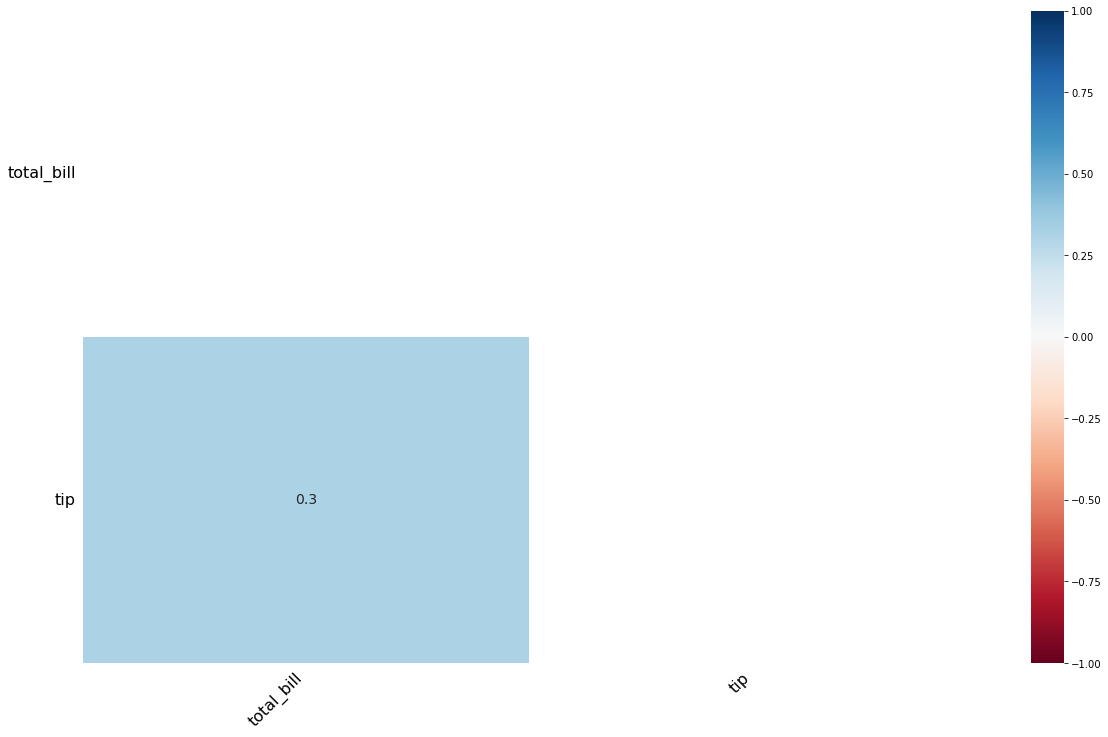

In [22]:
describe_missing(data)

### duplicates

In [23]:
describe_duplicates(data)

[info] Function "describe_duplicates()" finished in 0.04 seconds.


,col0,col1,col2,col3,col4,num_cols,percent_dupli
30,sex,smoker,day,time,size,5,77.459016
25,sex,smoker,day,time,,4,91.803279
29,smoker,day,time,size,,4,86.475410
27,sex,smoker,time,size,,4,86.065574
28,sex,day,time,size,,4,86.065574
26,sex,smoker,day,size,,4,78.688525
16,sex,smoker,time,,,3,96.721311
18,sex,day,time,,,3,95.491803
21,smoker,day,time,,,3,95.491803
15,sex,smoker,day,,,3,93.442623


---
## LOAD *Wine* data

In [24]:
from sklearn import datasets
df = datasets.load_wine()
data = pd.DataFrame(data= np.c_[df['data'], df['target']],columns= list(df['feature_names']) + ['target'])
data['target'] = data['target'].apply(lambda x: df['target_names'][int(x)])
data.shape

(178, 14)

### general info

In [25]:
describe_info(data)

,types,mixed_types,unique,magnitude,%nan,num_records
variable,,,,,,
alcohol,float64,float,126,1.0,0.0,178
malic_acid,float64,float,133,0.0,0.0,178
ash,float64,float,79,0.0,0.0,178
alcalinity_of_ash,float64,float,63,1.0,0.0,178
magnesium,float64,float,53,1.0,0.0,178
total_phenols,float64,float,97,0.0,0.0,178
flavanoids,float64,float,132,0.0,0.0,178
nonflavanoid_phenols,float64,float,39,-1.0,0.0,178
proanthocyanins,float64,float,101,0.0,0.0,178


### numerical

In [26]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

[info] Function "describe_numeric()" finished in 6.95 seconds.


,count,mode,mean,std,iqr,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
alcohol,178,13.05,13.00,0.81,1.32,11.03,11.66,12.36,13.05,13.68,14.22,14.83,-0.86,-0.05,False,False,True
malic_acid,178,1.73,2.34,1.12,1.48,0.74,1.06,1.60,1.87,3.08,4.46,5.80,0.26,1.03,False,False,True
ash,178,2.30,2.37,0.27,0.35,1.36,1.92,2.21,2.36,2.56,2.74,3.23,1.08,-0.18,False,False,True
alcalinity_of_ash,178,20.00,19.49,3.34,4.30,10.60,14.77,17.20,19.50,21.50,25.00,30.00,0.44,0.21,False,True,True
magnesium,178,88.00,99.74,14.28,19.00,70.00,80.85,88.00,98.00,107.00,124.30,162.00,2.01,1.09,False,False,True
total_phenols,178,2.20,2.30,0.63,1.06,0.98,1.38,1.74,2.36,2.80,3.27,3.88,-0.85,0.09,False,False,True
flavanoids,178,2.65,2.03,1.00,1.67,0.34,0.55,1.20,2.13,2.88,3.50,5.08,-0.89,0.03,False,False,False
nonflavanoid_phenols,178,0.26,0.36,0.12,0.17,0.13,0.19,0.27,0.34,0.44,0.60,0.66,-0.65,0.45,False,False,True
proanthocyanins,178,1.35,1.59,0.57,0.70,0.41,0.73,1.25,1.56,1.95,2.71,3.58,0.51,0.51,False,False,True
color_intensity,178,3.80,5.06,2.32,2.98,1.28,2.11,3.22,4.69,6.20,9.60,13.00,0.34,0.86,False,False,True


### categorical

In [27]:
# describe
dfc = describe_categorical(data, max_size_cats = 3, alpha = .05)
dfc

[info] Function "describe_categorical()" finished in 0.01 seconds.


,count,unique,uniform,value0,value1,value2,%value0,%value1,%value2
var,,,,,,,,,
target,178,3,True,class_1,class_0,class_2,39.89,33.15,26.97


### bivariate relationship

In [28]:
describe_bivariate(data)

[info] Function "describe_bivariate()" finished in 17.66 seconds.


,variable1,variable2,depend_corr_linear,corr_linear,corr_non_linear,depend_chi2,subsamples_diff_dist
0,alcohol,malic_acid,False,0.09,0.31,NaN,NaN
1,alcohol,ash,True,0.29,0.21,NaN,NaN
2,alcohol,alcalinity_of_ash,True,-0.19,0.22,NaN,NaN
3,alcohol,magnesium,True,0.35,0.28,NaN,NaN
4,alcohol,total_phenols,True,0.38,0.32,NaN,NaN
5,alcohol,flavanoids,True,0.28,0.43,NaN,NaN
6,alcohol,nonflavanoid_phenols,False,-0.15,0.19,NaN,NaN
7,alcohol,proanthocyanins,True,0.26,0.26,NaN,NaN
8,alcohol,color_intensity,True,0.56,0.50,NaN,NaN
9,alcohol,hue,False,-0.05,0.22,NaN,NaN


### missing values

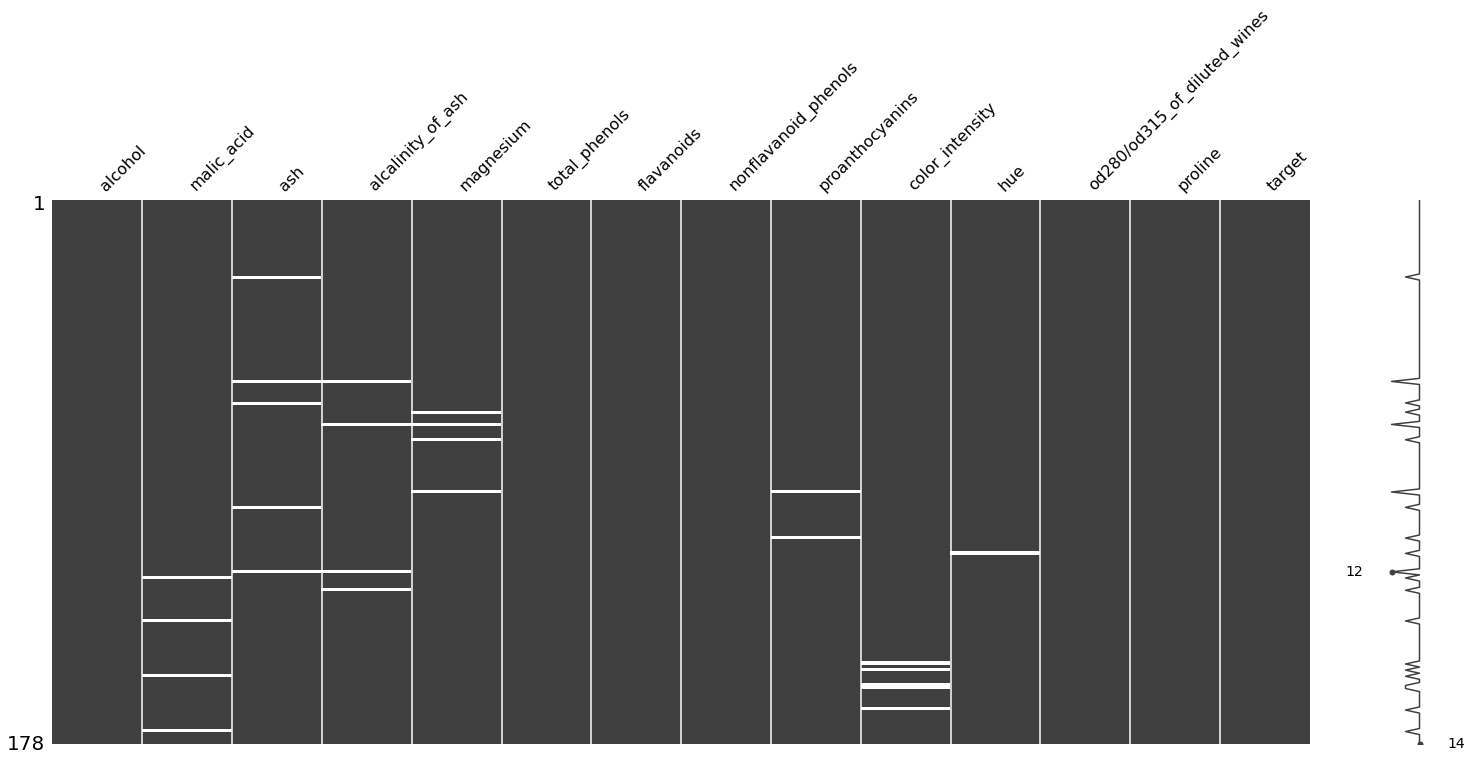

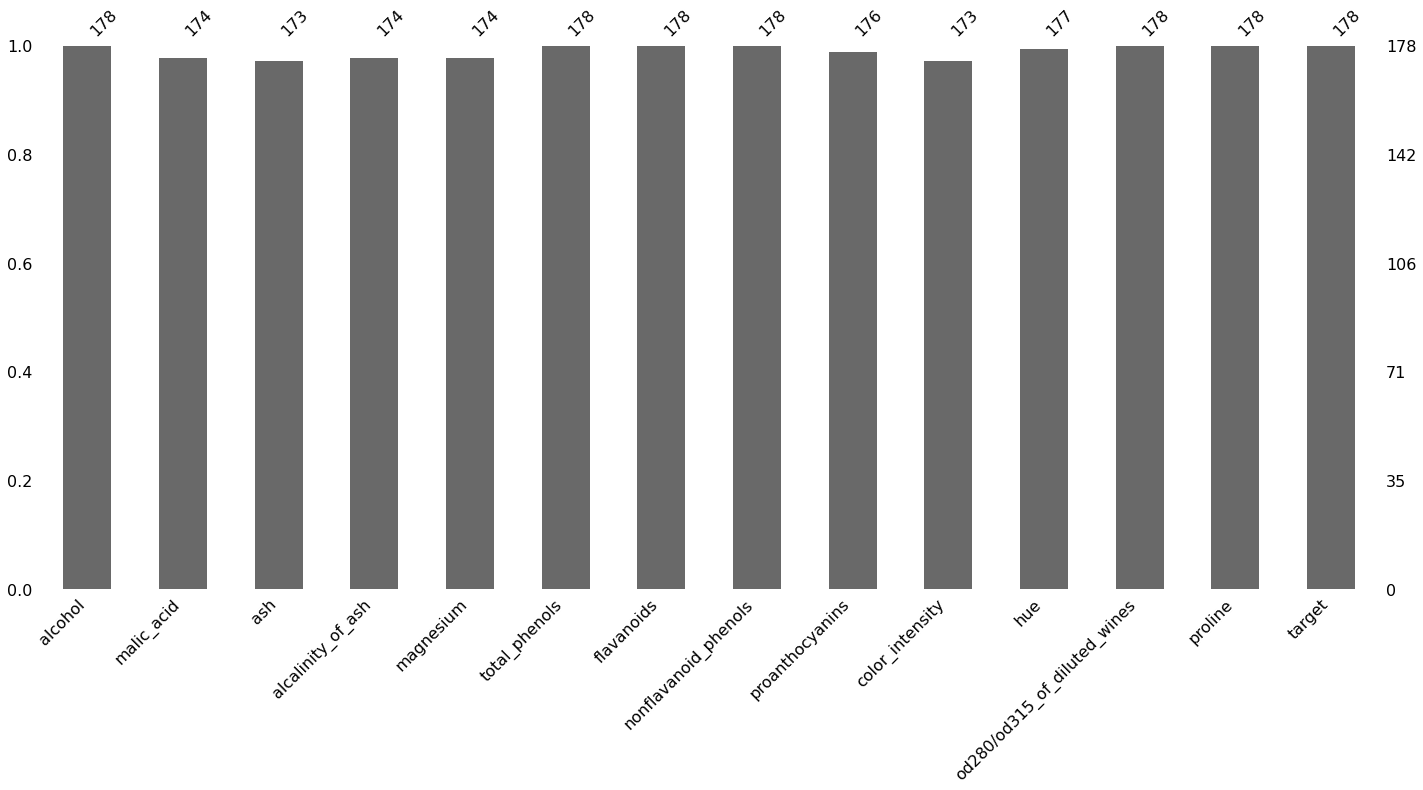

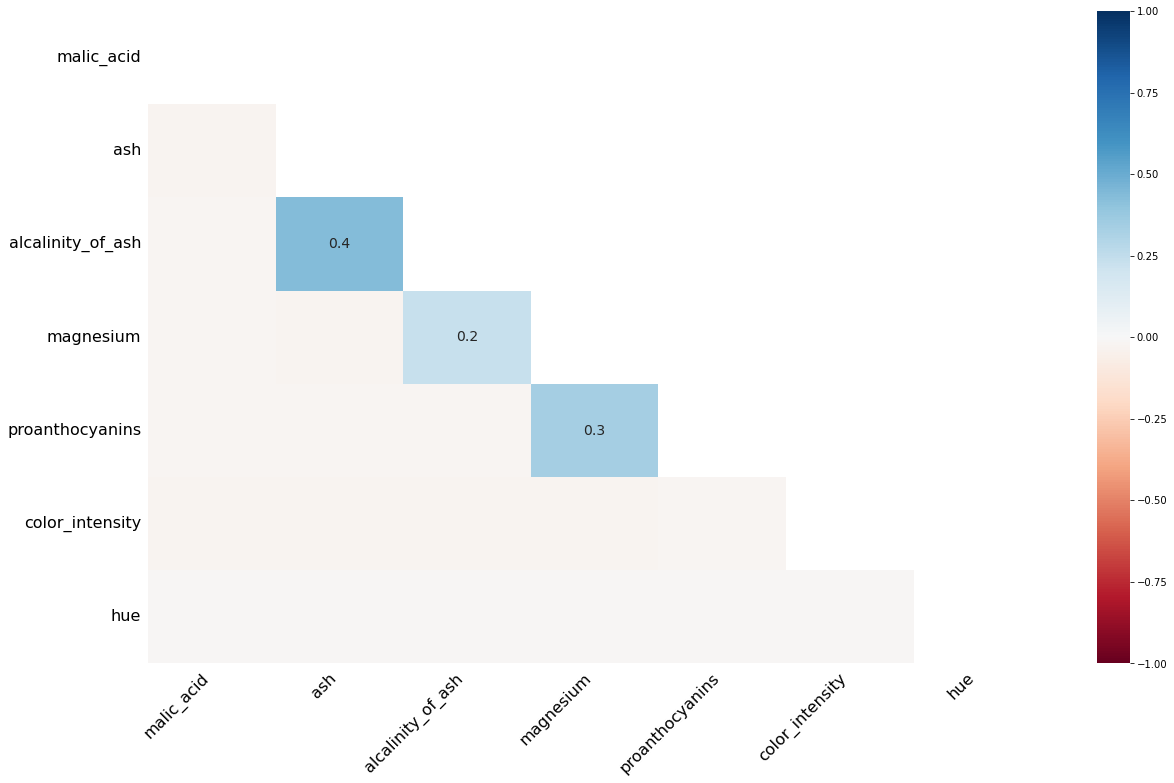

In [29]:
describe_missing(data)

### duplicates

In [30]:
describe_duplicates(data)

[info] Function "describe_duplicates()" finished in 0.01 seconds.


,col0,num_cols,percent_dupli
0,target,1,98.314607


---
## LOAD *Weather* data

In [31]:
path = 'https://raw.githubusercontent.com/jmquintana79/utilsDS/master/scripts/datasets/data/dataset.weather.csv.gz'
data = pd.read_csv(path)
data['datetime'] = pd.to_datetime(data['datetime'])
data['dtnow'] = [datetime(2022,1,1,12,0,0) for i in range(len(data))]
data['dtrandom'] = pd.to_datetime(np.sort(np.random.choice(pd.date_range('2015-01-01', '2018-01-01', freq='H'), len(data), replace=False)))
data.shape

(17544, 16)

### general info

In [32]:
describe_info(data)

,types,mixed_types,unique,magnitude,%nan,num_records
variable,,,,,,
datetime,datetime64[ns],pandas._libs.tslibs.timestamps.Timestamp,17544,NaN,0.00,17544
dtnow,datetime64[ns],pandas._libs.tslibs.timestamps.Timestamp,1,NaN,0.00,17544
dtrandom,datetime64[ns],pandas._libs.tslibs.timestamps.Timestamp,17544,NaN,0.00,17544
RH (%),float64,float,88,1.0,0.08,17530
WS (m/s),float64,float,108,0.0,0.06,17533
dew_point (degC),float64,float,434,1.0,0.08,17530
irradiation (MJ/m2),float64,float,362,0.0,40.93,10364
local_press (hPa),float64,float,481,3.0,0.00,17544
precipitation (mm),float64,float,38,0.0,80.52,3417


### numerical

In [33]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

[info] Function "describe_numeric()" finished in 51.02 seconds.


,count,mode,mean,std,iqr,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
RH (%),17530,100.0,68.47,20.44,32.00,13.0,34.0,53.00,70.00,85.00,99.00,100.00,-0.89,-0.22,False,False,True
WS (m/s),17533,2.1,2.83,1.43,1.80,0.0,1.0,1.80,2.50,3.60,5.60,12.20,1.76,1.12,False,False,True
dew_point (degC),17530,22.1,9.77,10.32,18.40,-20.1,-7.2,0.90,10.70,19.30,23.90,27.30,-1.14,-0.24,False,False,True
irradiation (MJ/m2),10364,0.0,0.92,0.94,1.47,0.0,0.0,0.11,0.59,1.58,2.83,3.71,-0.26,0.91,False,False,False
local_press (hPa),17544,1008.2,1010.94,7.52,10.40,965.5,998.5,1005.90,1011.00,1016.30,1022.90,1031.30,0.38,-0.30,False,False,True
precipitation (mm),3417,0.0,0.94,2.21,1.00,0.0,0.0,0.00,0.00,1.00,4.60,40.00,45.60,5.14,False,False,False
sea-level pressure (hPa),17544,1014.3,1013.82,7.58,10.50,968.2,1001.4,1008.70,1013.90,1019.20,1025.90,1034.40,0.36,-0.29,False,False,True
sunlight_duration (h),9570,0.0,0.41,0.43,1.00,0.0,0.0,0.00,0.20,1.00,1.00,1.00,-1.65,0.37,False,False,False
temperature (degC),17544,22.1,16.17,8.18,14.00,-2.2,3.6,9.00,16.40,23.00,28.70,37.30,-1.11,-0.01,False,False,True
vapor_press (hPa),17530,4.4,14.62,8.82,15.80,1.2,3.6,6.50,12.80,22.30,29.70,36.30,-1.16,0.40,False,False,True


### categorical

In [34]:
# describe
dfc = describe_categorical(data, max_size_cats = 17, alpha = .05)
dfc

[info] Function "describe_categorical()" finished in 0.13 seconds.


,count,unique,uniform,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,%value0,%value1,%value2,%value3,%value4,%value5,%value6,%value7,%value8,%value9,%value10,%value11,%value12,%value13,%value14,%value15,%value16
var,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WD,17533,17,False,NNW,NW,S,SSE,NNE,N,NE,SSW,SE,ENE,WNW,E,ESE,SW,W,WSW,C,15.21,13.43,10.26,9.9,7.21,7.07,6.78,5.27,5.26,4.92,4.81,2.89,2.15,1.76,1.52,1.49,0.07
cloud_coverage,5117,13,False,10-,10,0+,0,9,1,8,2,3,7,6,4,5,,,,,32.21,21.91,9.71,7.64,4.34,3.93,3.89,3.79,3.17,3.01,2.7,2.05,1.66,,,,


### datetimes

In [35]:
dfdt = describe_datetime(data)
dfdt

,count,unique,most_frequent,num_most_frequent,first,last,most_frequent_td,%most_frequent_td,num_td
datetime,17544,17544,NaT,NaN,2016-01-01 00:00:00,2017-12-31 23:00:00,"(0 days 01:00:00,)",100.00,1
dtnow,17544,1,2022-01-01 12:00:00,17544,2022-01-01 12:00:00,2022-01-01 12:00:00,"(0 days 00:00:00,)",100.00,1
dtrandom,17544,17544,NaT,NaN,2015-01-01 02:00:00,2018-01-01 00:00:00,"(0 days 01:00:00,)",66.32,10


### bivariate relationships

In [36]:
describe_bivariate(data, size_max_sample=500)

[warning] It has taken a random sample with 5000 records.
[info] it was simplified the categorical variable 'WD'.
[info] it was simplified the categorical variable 'cloud_coverage'.
[info] Function "describe_bivariate()" finished in 13.80 seconds.


,variable1,variable2,depend_corr_linear,corr_linear,corr_non_linear,depend_chi2,subsamples_diff_dist
0,RH (%),WS (m/s),True,-0.28,0.12,NaN,NaN
1,RH (%),dew_point (degC),True,0.70,0.44,NaN,NaN
2,RH (%),irradiation (MJ/m2),True,-0.53,0.34,NaN,NaN
3,RH (%),local_press (hPa),True,-0.25,0.18,NaN,NaN
4,RH (%),precipitation (mm),True,0.49,0.33,NaN,NaN
5,RH (%),sea-level pressure (hPa),True,-0.26,0.18,NaN,NaN
6,RH (%),sunlight_duration (h),True,-0.60,0.37,NaN,NaN
7,RH (%),temperature (degC),True,0.31,0.26,NaN,NaN
8,RH (%),vapor_press (hPa),True,0.63,0.43,NaN,NaN
9,RH (%),visibility (km),True,-0.49,0.29,NaN,NaN


### missing values

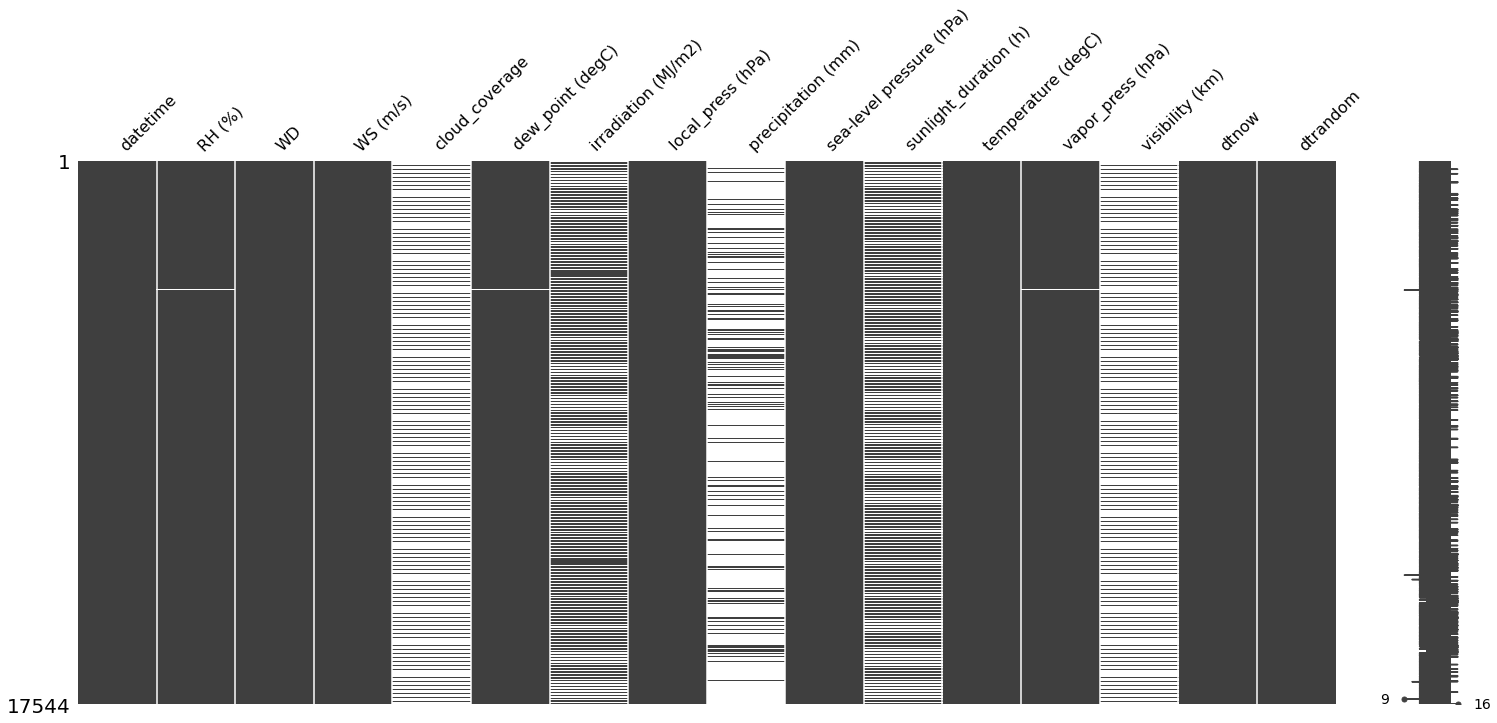

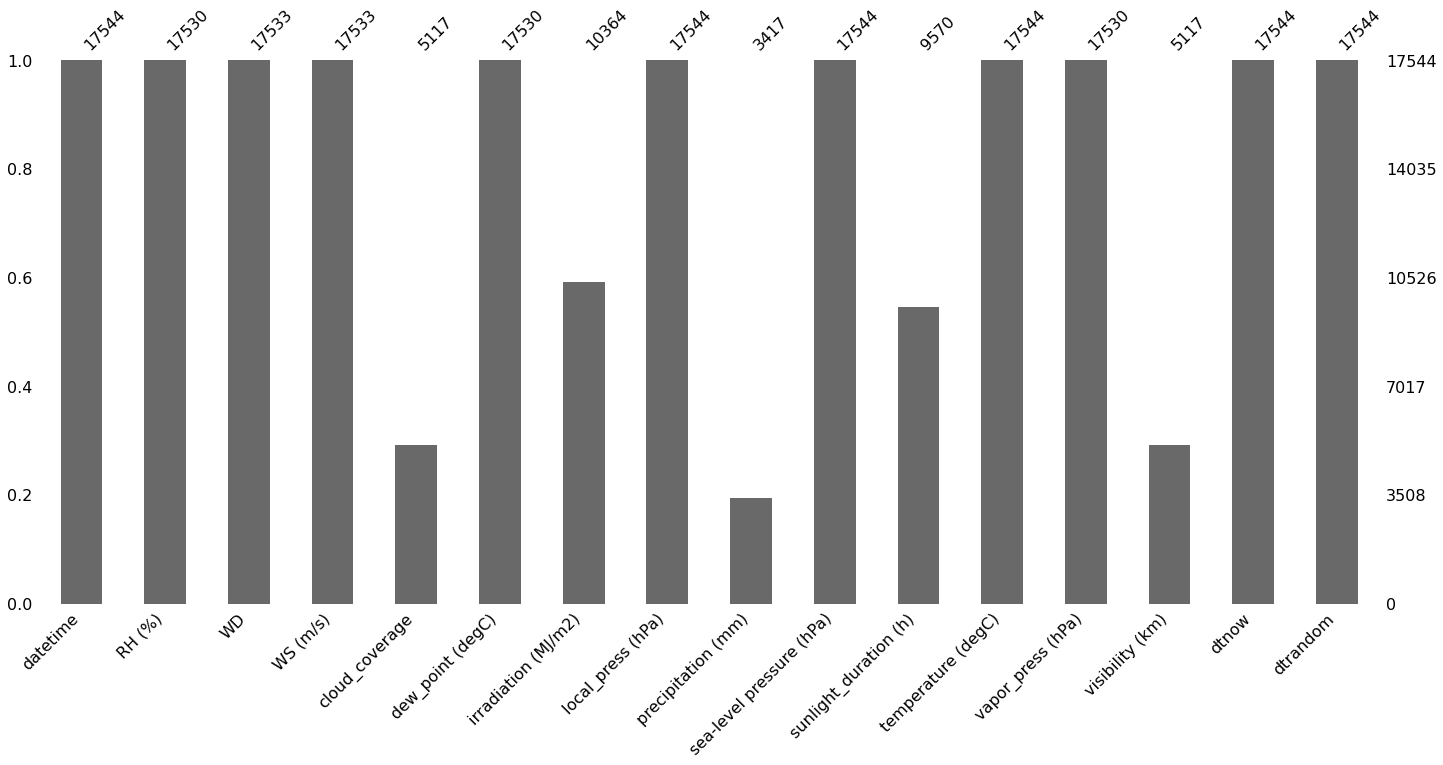

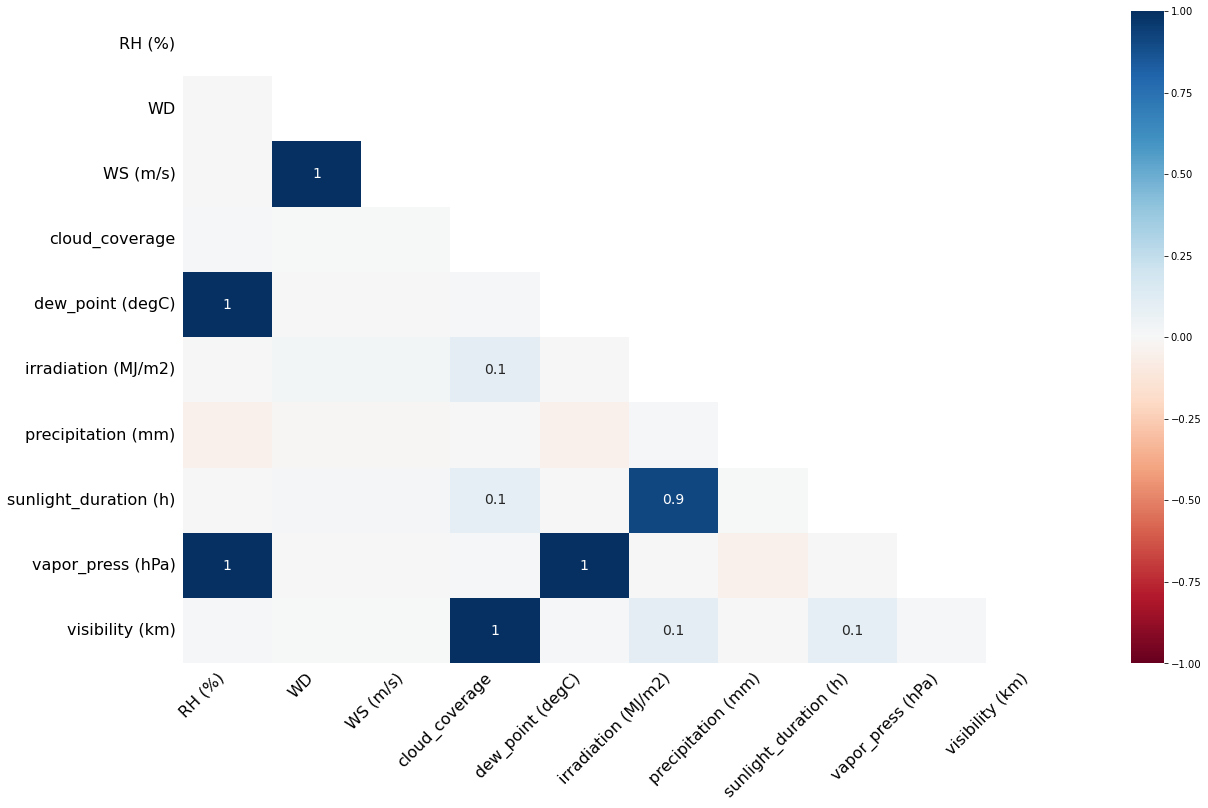

In [37]:
describe_missing(data)

### duplicates

In [38]:
describe_duplicates(data)

[info] Function "describe_duplicates()" finished in 0.03 seconds.


,col0,col1,num_cols,percent_dupli
2,WD,cloud_coverage,2,98.717510
1,cloud_coverage,,1,99.920201
0,WD,,1,99.897401


---
## LOAD *Monthly Sunpots* data

In [39]:
url_data = "https://raw.githubusercontent.com/jmquintana79/Datasets/master/monthly-sunspots.csv"
data = pd.read_csv(url_data, sep = ',').set_index("Month")
data["month"] = [m.split("-")[1] for m in data.index]

### general info

In [40]:
describe_info(data)

,types,mixed_types,unique,magnitude,%nan,num_records
variable,,,,,,
Sunspots,float64,float,1140,1.0,0.0,2820
month,object,str,12,NaN,0.0,2820


### numerical

In [41]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

[info] Function "describe_numeric()" finished in 1.67 seconds.


,count,mode,mean,std,iqr,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
Sunspots,2820,0.0,51.27,43.45,59.23,0.0,1.7,15.7,42.0,74.93,138.2,253.8,0.98,1.1,False,False,True


### categorical

In [42]:
# describe
dfc = describe_categorical(data, max_size_cats = 12, alpha = .05)
dfc

[info] Function "describe_categorical()" finished in 0.03 seconds.


,count,unique,uniform,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,%value0,%value1,%value2,%value3,%value4,%value5,%value6,%value7,%value8,%value9,%value10,%value11
var,,,,,,,,,,,,,,,,,,,,,,,,,,,
month,2820,12,True,01,05,09,06,11,04,03,02,12,08,10,07,8.33,8.33,8.33,8.33,8.33,8.33,8.33,8.33,8.33,8.33,8.33,8.33


### bivariate relationship

In [43]:
describe_bivariate(data, size_max_sample=500)

[info] it was simplified the categorical variable 'month'.
[info] Function "describe_bivariate()" finished in 0.04 seconds.


,variable1,variable2,depend_corr_linear,corr_linear,corr_non_linear,depend_chi2,subsamples_diff_dist
0,month,Sunspots,NaN,NaN,NaN,NaN,False


### missing values

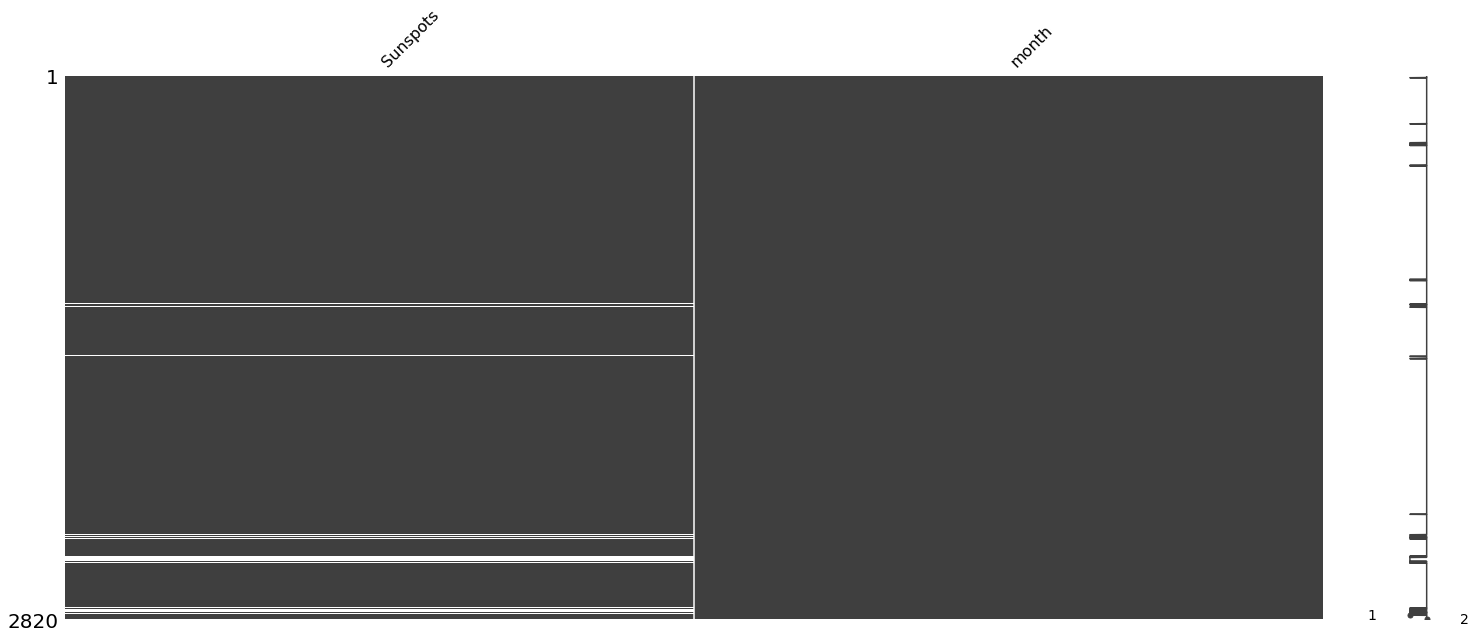

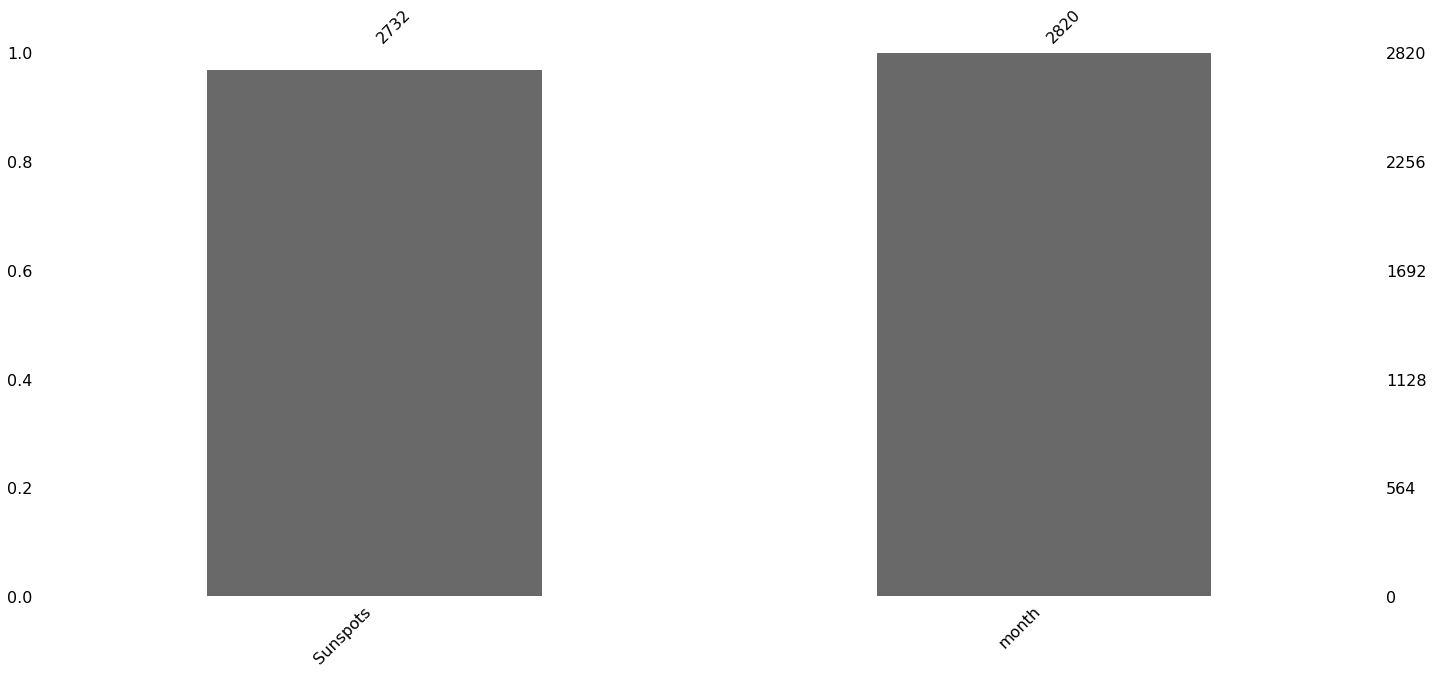

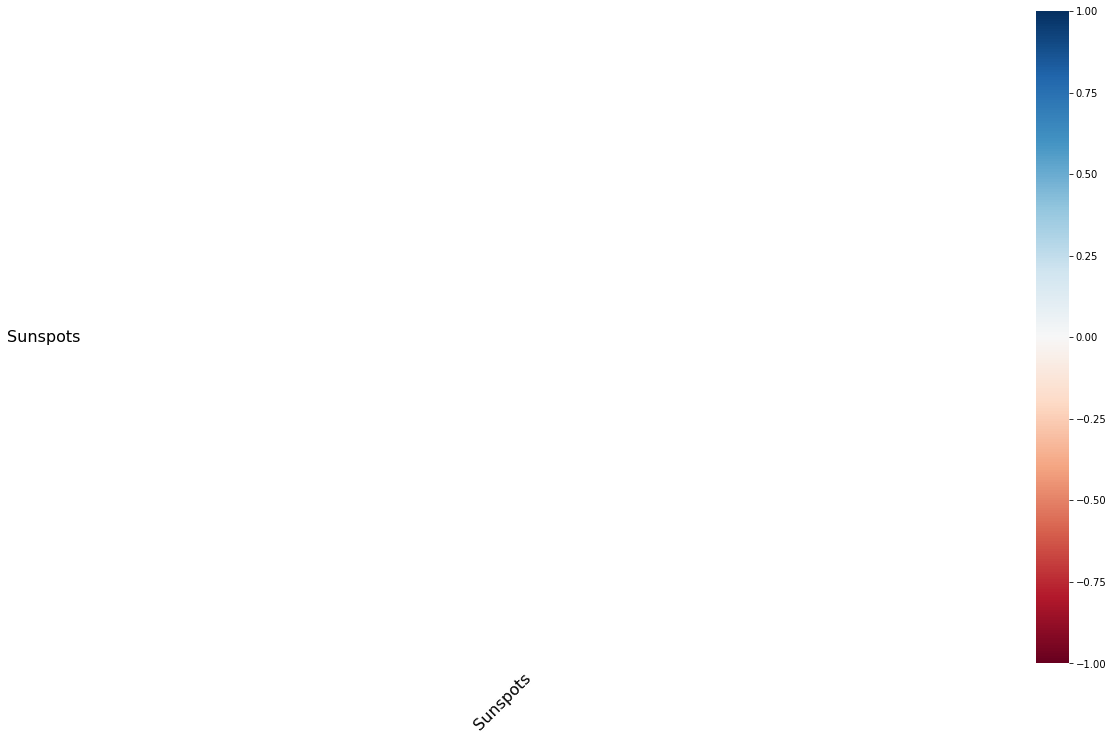

In [44]:
describe_missing(data)

### duplicates

In [45]:
describe_duplicates(data)

[info] Function "describe_duplicates()" finished in 0.01 seconds.


,col0,num_cols,percent_dupli
0,month,1,99.822695
